In [62]:
from importlib.metadata import version
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import summa
import nltk
import re
import urllib.request
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
print(data.isnull().sum())
data.head()

headlines    0
text         0
dtype: int64


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [4]:
data = data.sample(98000)

In [5]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text 
    sentence = re.sub(r'\([^)]*\)', '', sentence)
    sentence = re.sub('"','', sentence)
    sentence = re.sub(r"'s\b","", sentence)
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = re.sub('[m]{2,}', 'mm', sentence)
    
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
        
    tokens = [contractions[s] if s in contractions else s for s in tokens.split()]
    return tokens

In [7]:
preprocessed_headlines = [preprocess_sentence(s, remove_stopwords=False) for s in data["headlines"]]
preprocessed_text = [preprocess_sentence(s) for s in data["text"]]

In [8]:
print(len(preprocessed_headlines), len(preprocessed_text))
print(preprocessed_headlines[:5])
print(preprocessed_text[:5])
print("null" for i in preprocessed_headlines if len(i) == 0)
print("null" for i in preprocessed_text if len(i) == 0)

98000 98000
[['sudhir', 'mishra', 'plans', 'sequel', 'to', 'hazaaron', 'khwaishein', 'aisi'], ['yr', 'old', 'gets', 'new', 'zealand', 'to', 'make', 'gender', 'neutral', 'road', 'signs'], ['pak', 'captain', 'sarfaraz', 'banned', 'for', 'matches', 'over', 'abey', 'kaale', 'remark'], ['lais', 'ribeiro', 'to', 'wear', 'cr', 'fantasy', 'bra', 'at', 'vs', 'fashion', 'show'], ['plastic', 'coins', 'recovered', 'in', 'dera', 'hq', 'search', 'operation']]
[['filmmaker', 'sudhir', 'mishra', 'planning', 'make', 'sequel', 'directorial', 'hazaaron', 'khwaishein', 'aisi', 'released', 'original', 'film', 'starred', 'kay', 'kay', 'menon', 'chitrangda', 'singh', 'shiney', 'ahuja', 'lead', 'roles', 'like', 'make', 'film', 'actors', 'take', 'call', 'later', 'said', 'sudhir'], ['new', 'zealand', 'transport', 'agency', 'agreed', 'update', 'linemen', 'signs', 'line', 'crew', 'receiving', 'letter', 'seven', 'year', 'old', 'pointed', 'women', 'line', 'workers', 'think', 'sign', 'wrong', 'unfair', 'agree', 'zoe

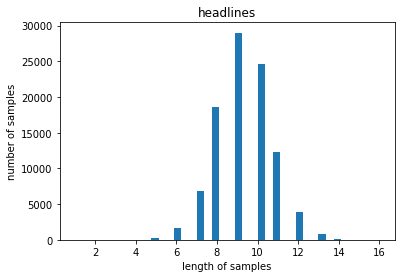

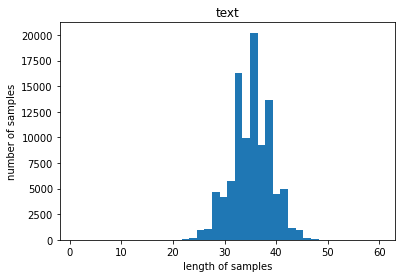

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.078948979591836
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.263989795918368


In [9]:
headlines_len = [len(s) for s in preprocessed_headlines]
text_len = [len(s) for s in preprocessed_text]

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

In [10]:
data = pd.DataFrame(list(zip(preprocessed_headlines, preprocessed_text)), columns=["headlines", "text"])

for i in range(len(data)):
    if len(data.iloc[i]["headlines"]) < 4 or len(data.iloc[i]["text"]) < 4:
        print(i)

42837
62673
91078


In [11]:
decoder_input = [["<sos>"]+s for s in preprocessed_headlines]
decoder_output = [s+["<eos>"] for s in preprocessed_headlines]

In [12]:
headlines_maxlen = 17
text_maxlen = 60

In [13]:
eng_tokenizer = tf.keras.preprocessing.text.Tokenizer()
eng_tokenizer.fit_on_texts(preprocessed_text+decoder_input+decoder_output)

In [14]:
threshold = 7
total_cnt = len(eng_tokenizer.word_index)
rare_cnt = 0 
total_freq = 0 
rare_freq = 0

for key, value in eng_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 77171
등장 빈도가 6번 이하인 희귀 단어의 수: 48798
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 28373
단어 집합에서 희귀 단어의 비율: 63.2335981132809
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.908898079981591


In [15]:
eng_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=27000)
eng_tokenizer.fit_on_texts(preprocessed_text+decoder_input+decoder_output)

encoder_input = eng_tokenizer.texts_to_sequences(preprocessed_text)
decoder_input = eng_tokenizer.texts_to_sequences(decoder_input)
decoder_output = eng_tokenizer.texts_to_sequences(decoder_output)

In [16]:
encoder_input = tf.keras.preprocessing.sequence.pad_sequences(encoder_input, maxlen=text_maxlen, padding="post")
decoder_input = tf.keras.preprocessing.sequence.pad_sequences(decoder_input, maxlen=headlines_maxlen, padding="post")
decoder_output = tf.keras.preprocessing.sequence.pad_sequences(decoder_output, maxlen=headlines_maxlen, padding="post")

In [17]:
size_of_data = len(encoder_input)
train_size = int(size_of_data*0.8)

encoder_train_input = encoder_input[:train_size]
encoder_test_input = encoder_input[train_size:]

decoder_train_input = decoder_input[:train_size]
decoder_test_input = decoder_input[train_size:]

decoder_train_output = decoder_output[:train_size]
decoder_test_output = decoder_output[train_size:]

In [18]:
word_dim = 256
hidden_size = 512

In [19]:
encoder_inputs = tf.keras.layers.Input(shape=(text_maxlen,))
encoder_embedding = tf.keras.layers.Embedding(27000, word_dim)(encoder_inputs)
encoder_lstm1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, _, _ = encoder_lstm1(encoder_embedding)
encoder_lstm2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, _, _ = encoder_lstm2(encoder_output1)
encoder_lstm3 = tf.keras.layers.LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [20]:
decoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_embedding = tf.keras.layers.Embedding(27000, word_dim)(decoder_inputs)
decoder_lstm1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm1(decoder_embedding, initial_state=[state_h, state_c])

attn_layer = tf.keras.layers.AdditiveAttention(name='attention_layer')
attn_out = attn_layer([decoder_outputs, encoder_outputs])

decoder_concat_input = tf.keras.layers.Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_softmax_layer = tf.keras.layers.Dense(27000, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input) 

In [21]:
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 256)      6912000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 60, 512), (N 1574912     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [22]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

history = model.fit(x=[encoder_train_input, decoder_train_input], 
                    y=decoder_train_output, 
                    validation_data=([encoder_test_input, decoder_test_input], decoder_test_output), 
                    batch_size=256, 
                    callbacks=[es], 
                    epochs=50)

Epoch 1/50
307/307 [==============================] - 172s 541ms/step - loss: 4.3088 - val_loss: 3.9853
Epoch 2/50
307/307 [==============================] - 166s 541ms/step - loss: 3.7592 - val_loss: 3.6240
Epoch 3/50
307/307 [==============================] - 166s 542ms/step - loss: 3.4141 - val_loss: 3.4007
Epoch 4/50
307/307 [==============================] - 166s 541ms/step - loss: 3.1646 - val_loss: 3.2301
Epoch 5/50
307/307 [==============================] - 166s 541ms/step - loss: 2.9681 - val_loss: 3.1239
Epoch 6/50
307/307 [==============================] - 166s 542ms/step - loss: 2.8034 - val_loss: 3.0877
Epoch 7/50
307/307 [==============================] - 166s 541ms/step - loss: 2.6606 - val_loss: 3.0041
Epoch 8/50
307/307 [==============================] - 166s 542ms/step - loss: 2.5360 - val_loss: 2.9662
Epoch 9/50
307/307 [==============================] - 166s 542ms/step - loss: 2.4231 - val_loss: 2.9468
Epoch 10/50
307/307 [==============================] - 166s 542m

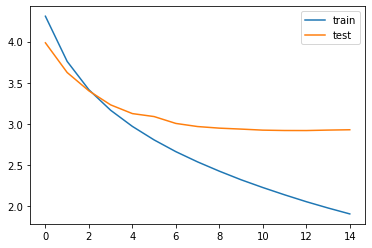

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
encoder_model = tf.keras.models.Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = tf.keras.layers.Input(shape=(hidden_size,))
decoder_state_input_c = tf.keras.layers.Input(shape=(hidden_size,))

decoder_outputs, state_h2, state_c2 = decoder_lstm1(decoder_embedding, initial_state=[decoder_state_input_h, decoder_state_input_c])

decoder_hidden_state_input = tf.keras.layers.Input(shape=(text_maxlen, hidden_size))

attn_out_inf = attn_layer([decoder_outputs, decoder_hidden_state_input])

decoder_inf_concat = tf.keras.layers.Concatenate(axis=-1, name='concat')([decoder_outputs, attn_out_inf])
decoder_outputs = decoder_softmax_layer(decoder_inf_concat) 

decoder_model = tf.keras.models.Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs] + [state_h2, state_c2])

In [108]:
def decode_sequence(input_sentence):
    e_out, e_h, e_c = encoder_model.predict(input_sentence)
    target_seq = np.zeros((1,1)) 
    target_seq[0, 0] = eng_tokenizer.word_index["<sos>"]
    
    flag = True
    decoded_sentence = ""
    while flag:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index ==0:
            flag = False
        else:
            sampled_token = eng_tokenizer.index_word[sampled_token_index]
            decoded_sentence += ' ' + sampled_token

            if sampled_token == "<eos>" or len(decoded_sentence) > headlines_maxlen:
                flag = False
  
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = sampled_token_index

            states_value = [h, c]

    return decoded_sentence


In [109]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if i != 0:
            temp = temp + str(eng_tokenizer.index_word[i])+' '
    return temp

def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if i != 0 and i != eng_tokenizer.word_index["<sos>"] and i != eng_tokenizer.word_index["<eos>"]:
            temp = temp + eng_tokenizer.index_word[i] + ' '
    return temp


In [115]:
for i in range(30, 35):
    print("원문 :", seq2text(encoder_test_input[i]))
    print("실제 요약 :", seq2summary(decoder_test_input[i]))
    print("예측 요약 :", decode_sequence(encoder_test_input[i].reshape(1, text_maxlen)))
    print("\n")

원문 : organiser young achievers matrimony meet said made mistake advertisement event listed beautiful women young achievers made mistake putting beautiful girls achievers india criticising us come event said ad appeared hindu bengaluru edition 
실제 요약 : who ll come to event now founder of young achievers matrimony 
예측 요약 :  meghan markle don


원문 : six people including four children family killed vietnam war era bomb exploded country nh province victims dormant explosive scrap metal explosion occurred reports said nearly lakh tonnes explosives used vietnam war remain hidden country according government figures 
실제 요약 : killed in vietnam war era bomb explosion 
예측 요약 :  killed in yrs after


원문 : class student allegedly tied electric pole left sun around three hours attending school telangana child father punished attend school week child parents let counselled case registered police officials said 
실제 요약 : father ties minor son to pole for skipping school in gana 
예측 요약 :  class class cl

In [123]:
data_s = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
for i in range(30, 35):
    print("원문 :", data_s['text'][i])
    print("실제 요약 :", data_s['headlines'][i])
    print("추출적 요약 :", summarize(data_s['text'][i], words=headlines_maxlen))
    print()

원문 : Italian third division football side Lucchese's head coach Giancarlo Favarin has been banned for five months for headbutting Alessandria's assistant coach Gaetano Mancino during a brawl following the teams' 2-2 draw on Sunday. Mancino was caught off-balance and knocked to the ground after the headbutt. Earlier in the match, Favarin had told his own player to break an opponent's legs.
실제 요약 : Italian coach knocks rival down with headbutt, banned for 5 months
추출적 요약 : Italian third division football side Lucchese's head coach Giancarlo Favarin has been banned for five months for headbutting Alessandria's assistant coach Gaetano Mancino during a brawl following the teams' 2-2 draw on Sunday.

원문 : Cyclists taking part in National Track Cycling Championship in Jaipur opted to sleep on the floor inside the stadium instead of hotels over expensive cycles. The organisers had booked hotels but they didn't have the provision for cyclists to keep their bikes inside. A national gold medallis

## 결론

### seq2seq에 attention을 적용해서 기사를 요약해 보았습니다.
### 결론은 대실패... 그럭저럭 중요단어는 추출해낸거 같은데 뉴스 요약이라고 보기에는 힘든 제목이 출력되었습니다. 애초에 전처리부터 실패하지 않았나 싶긴한데 시간이 너무 부족해서 여러가지 테스팅을 해볼 수 없었다는게 한계였던거 같네요
### 사실 이번에 lstm다루면서 배운게 많았어서 더 해보고 싶긴한데 트레인 시간의 압박이 너무 컸죠 머 한번 돌리는데 1시간은 잡아야 했으니
### summa는 처음에 텍스트로 입력 줬을 때 안돌아서 너무 당황스러웠습니다. 급하게 예제 찾기는 했는데 지금도 이게 뭐지 싶은 라이브러리네요. 인코딩 방식에 따라 뭐 달라지는 건지 깃에는 그냥 string 넣으면 된다고 해놓고 막상 넣고 돌리면 아무것도 안나오고 워드갯수는 준다고 줘도 지맘대로 뽑고, 역시 사람들이 안 쓰는데는 그만한 이유가 다 있다~~~는걸 또한번 깨닿는 소중한 시간아었습니다

### attentional seq2seq vs summa
#### 완성도  attentional seq2seq < summa
#### 안정성 attentional seq2seq > summa
#### 적합도 attentional seq2seq > summa
#### 성능    attentional seq2seq < summa